<div style="background-color:	#216375 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:black"> Autonomous Systems: Portfolio 1 </h1>
<b style="color:white"> Jort Akershoek, Julia Boschman, Daan Eising, Rogier Gernaat</b>
    </div>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
    - [&sect;1.1: Imports](#1.1)
2. [H2: Use Case](#2.0)
    - [&sect;2.1: Kiezen van Use Case](#2.1)
    - [&sect;2.2: Probleemdefinitie en Doelstelling](#2.2)
3. [H3: Ontwerp van de Regelset](#3.0)
4. [H4: Implementatie in Python](#4.0)
    - [&sect;4.1: Systeemontwikkeling](#4.1)
    - [&sect;4.2: Documentatie en Retroduceerbaarheid](#4.2)
5. [H5: Validatie en Vergelijking](#5.0)
    - [&sect;5.1: Testen en Evaluatie](#5.1)
    - [&sect;5.2: Vergelijking met Alternatieven](#5.2)
    - [&sect;5.3: Visualisatie](#5.3)
6. [H6: Rapport](#6.0)
    - [&sect;6.1: Probleemstelling](#6.1)
    - [&sect;6.2: Methodologie](#6.2)
    - [&sect;6.3: Resultaten](#6.3)
    - [&sect;6.4: Reflectie](#6.4)
7. [H7: Literatuurlijst](#7.0)
8. [H8: Beoordelingscriteria](#8.0)

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;1.1: Imports</h3>

In [15]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
from pettingzoo.classic import connect_four_v3
import numpy as np

[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Use Case</strong></h2>
</div>

- [X] Kies een omgeving van pettingzoo of Gymnasium Documentation (niet een omgeving die in de zelfstudie al gebruikt wordt).

<a name='2.1'></a>
<h3>&sect;2.1: Kiezen van Use Case</h3>

Voor de opdracht van Autonomous Systems hebben wij gekeken naar de mogelijk opties die pettingzoo.com te bieden heeft. Er was één use case die ons allemaal aansprak en dat was de [Vier op een Rij](https://pettingzoo.farama.org/environments/classic/connect_four/) use case. Het leek ons een leuke maar ook lastige uitdaging. De hele groep is bekend met het spel en vinden het ook leuk om te doen. Dat is dan ook de voornaamste reden dat wij voor deze use case hebben gekozen.

- [X] Beschrijf helder welk probleem je wilt oplossen en waarom een rule-based benadering geschikt is.
- [X] Analyseer het probleem: waarom is een rule-based systeem hier effectief en wat zijn de voordelen ten opzichte van alternatieve methoden zoals machine learning?

<a name='2.2'></a>
<h3>&sect;2.2: Probleemdefinitie en Doelstelling</h3>

Connect Four is een strategisch spel voor twee spelers waarin de spelers om de beurt een schijfje (beide een eigen kleur) in een van de zeven kolommen laten vallen. Het doel is om als eerste vier de zelfde kleur schijven op een rij te krijgen (horizontaal, verticaal of diagonaal).

Voor deze opdracht willen we een rule-based agent ontwikkelen die effectief tegen een menselijke tegenstander kan spelen. De uitdaging is om een set regels te definiëren die de agent in staat stelt om strategische zetten te maken en te reageren op acties van de tegenstander.

De belangrijkste problemen die we willen aanpakken zijn:
- ***Bepalen van de beste zet***: Hoe kan de agent op basis van regels een sterke zet kiezen?
- ***Voorkomen van verlies***: Hoe kan de agent verlies vermijden door tegen de strategie van de tegenstander in te spelen?
- ***Balans tussen aanvallen en verdedigen***: Hoe kan de agent slim kiezen tussen het opbouwen van een eigen winnende combinatie en het blokkeren van de tegenstander?

Een rule-based systeem is hier een geschikte aanpak om de volgende redenen:
- ***Transparantie en begrijpelijkheid***: In tegenstelling tot machine learning-modellen zijn rule-based systemen goed te begrijpen en uitlegbaar. We kunnen precies zien welke regels de agent volgt en waarom een bepaalde zet wordt gemaakt.
- ***Snelheid en efficiëntie***: Een rule-based agent kan snelle beslissingen nemen zonder dat er complexe berekeningen of trainingstijd nodig is. Dit is handig voor real-time spelinteracties.
- ***Duidelijke strategieën en patronen***: Veel succesvolle Connect Four-strategieën kunnen worden vertaald naar regels, zoals het blokkeren van een tegenstander met drie op een rij of het benutten van een vrije kolom voor een winnende zet.
- ***Minder rekenkracht nodig***: In vergelijking met machine learning-modellen zoals deep reinforcement learning, vereist een rule-based systeem enn stuk minder rekenkracht en geheugen.

Een alternatieve aanpak zoals machine learning (bijv. een reinforcement learning agent) zou mogelijk sterker kunnen zijn, maar heeft een lange trainingsperiode nodig en vereist een grote hoeveelheid data. Voor deze opdracht is een rule-based aanpak dus een logische keuze.

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Vier op een Rij</strong></h2>
</div>

Eerst geven we een korte weergave van de Vier op een Rij van de pettingzoo.com module. Het spel wordt door gespeeld tot een van de twee kleuren vier fiches naast elkaar heeft. Vier op een rij dus. De code is afkomstig van [deze](https://pettingzoo.farama.org/environments/classic/connect_four/) pettingzoo.com pagina.

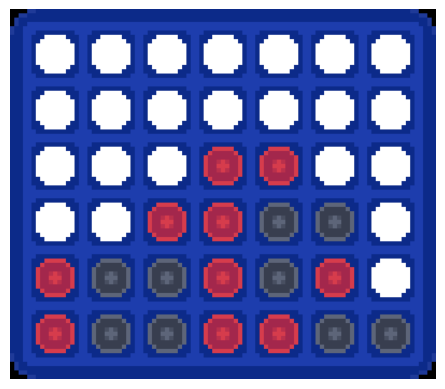

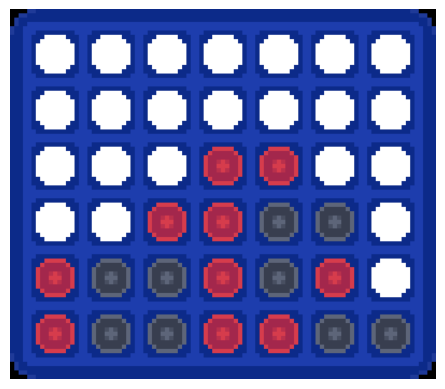

In [4]:
env = connect_four_v3.env(render_mode="rgb_array")
env.reset(seed=42)

frames = []

for agent in env.agent_iter():
    observation, reward, termination, truncation, info = env.last()

    if termination or truncation:
        action = None
    else:
        mask = observation["action_mask"]
        action = env.action_space(agent).sample(mask)

    env.step(action)

    frame = env.render()
    frames.append(frame)

    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.5)

env.close()

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Ontwerp van de Regelstel</strong></h2>
</div>

- [X] Definieer een uitgebreide set van regels die de beslissingen binnen het systeem sturen.
- [X] Zorg dat de regels logisch en niet tegenstrijdig zijn. 
- [X] Licht toe hoe regels elkaar prioriteren of combineren indien meerdere regels van toepassing zijn.


Om te beginnen met het opstellen van regels voor een spel, moet er gekeken worden naar verschillende soorten regels. Je hebt enkele basisregels die zeker gevolgd moeten worden. Enkele van deze basisregels worden hieronder beschreven.

1. Basisregels

Deze regels bepalen het meest fundamentele gedrag van de agent.
- Als de agent een zet kan doen waarmee hij direct wint, doe dan die zet.
- Als de tegenstander een zet kan doen waarmee hij wint, blokkeer die zet.
- Als er geen directe win- of verlieszet is, speel een zet die toekomstige winstmogelijkheden creëert.
- Als de agent niet strategisch hoeft te spelen, geef dan voorkeur aan het spelen in de middelste kolommen (indien beschikbaar).

Naast de basisregels zijn er ook nog prioriteiten en strategische regels nodig om het spel uiteindelijk te kunnen winnen. Er zijn hier ook verschillende lagen in, omdat er vaak meerdere mogelijke opties zijn, maar sommige zetten een hogere prioriteit hebben dan de andere. Zo is de zet met de hoogste prioriteit een winnende zet plaatsen. Deze heeft voorrang op een regel als "Het blokkeren van de vier op een rij van de tegenstander". Met de winnende zet is het spel namelijk afgelopen en heb je ook nog eens gewonnen. Hieronder worden de regels verdeeld onder vier soorten prioriteit van hoog naar middelhoog naar laag. Als er meerdere regels van toepassing zijn, moet de agent ze in een logische volgorde verwerken. Hieronder staan de regels in volgorde van belangrijkheid:

2. Prioriteiten en Strategische Regels

**Win- en Blokkeerregels (hoogste prioriteit)**
- *Regel 1*: Als de agent een zet kan doen waarmee hij direct vier op een rij krijgt, doe deze zet.
- *Regel 2*: Als de tegenstander een zet kan doen waarmee hij direct vier op een rij krijgt, blokkeer die zet.

**Aanvalsstrategieën (middelhoge prioriteit)**
- *Regel 3*: Probeer drie op een rij te maken met een open einde (zodat je later kunt winnen).
- *Regel 4*: Probeer een dubbele dreiging te creëren (twee mogelijke win-situaties tegelijk).
- *Regel 5*: Speel in een kolom waar je later een winnende zet kunt forceren.

**Verdedigingsstrategieën (middelhoge prioriteit)**
- *Regel 6*: Blokkeer tegenstander als hij drie op een rij heeft met een open einde.
- *Regel 7*: Vermijd zetten die de tegenstander een voordeel geven (bijv. een valstrik zetten waarin hij gegarandeerd wint).

**Positionele Voorkeuren (lage prioriteit)**
- *Regel 8*: Geef de voorkeur aan het spelen in de middelste kolommen boven de buitenste.
- *Regel 9*: Vermijd zetten in kolommen die de tegenstander helpen bij zijn strategie.

[Back to the top](#start)
<a name='4.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Implementatie in Python</strong></h2>
</div>

- [X] Implementeer je rule-based systeem in Python. Zorg ervoor dat je code modulair en overzichtelijk is.
- [X] Implementeer een baseline.
- [ ] Creëer een duidelijke mappenstructuur, een README-bestand en een requirements.txt waarin de gebruikte libraries staan vermeld.


<a name='4.1'></a>
<h3>&sect;4.1: Systeemontwikkeling</h3>

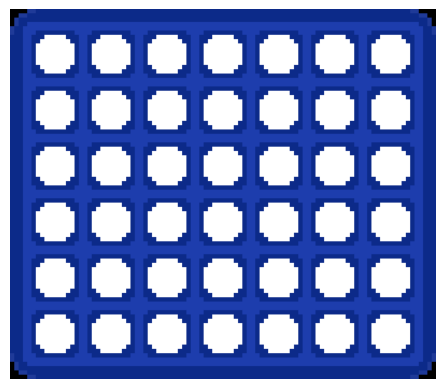

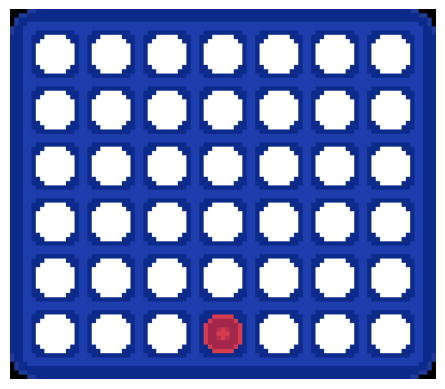


Beschikbare zetten (nummer = beschikbare kolom):
· · · O · · ·
· · · · · · ·
· · · · · · ·
· · · · · · ·
· · · · · · ·
· · · · · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 6


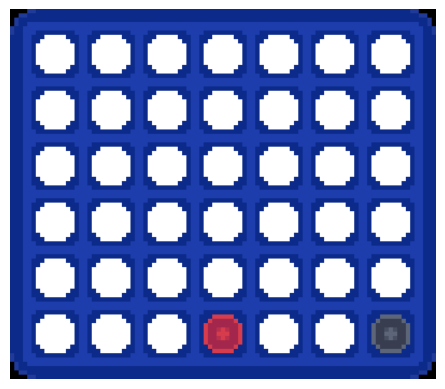

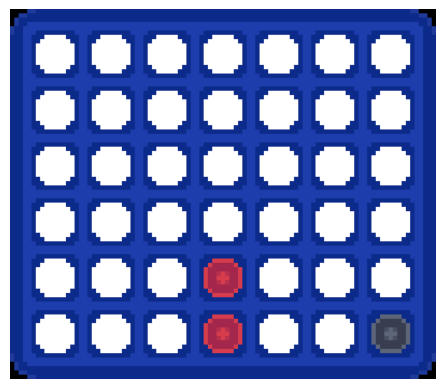


Beschikbare zetten (nummer = beschikbare kolom):
· · · O · · X
· · · O · · ·
· · · · · · ·
· · · · · · ·
· · · · · · ·
· · · · · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 3


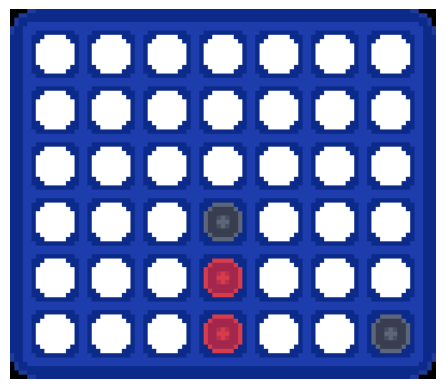

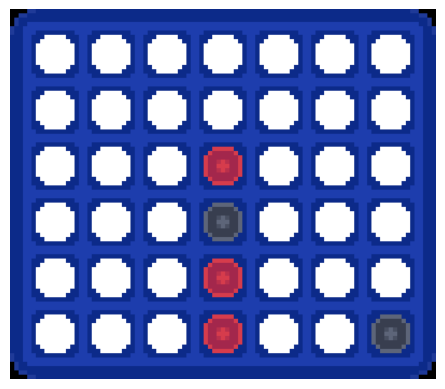


Beschikbare zetten (nummer = beschikbare kolom):
· · · O · · X
· · · O · · ·
· · · X · · ·
· · · O · · ·
· · · · · · ·
· · · · · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 4


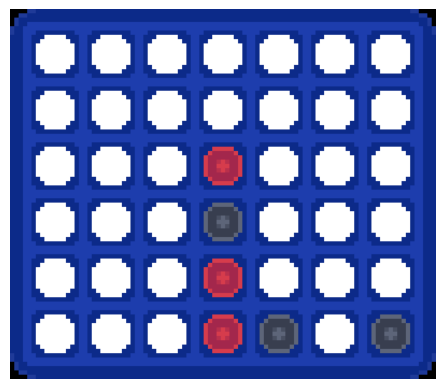

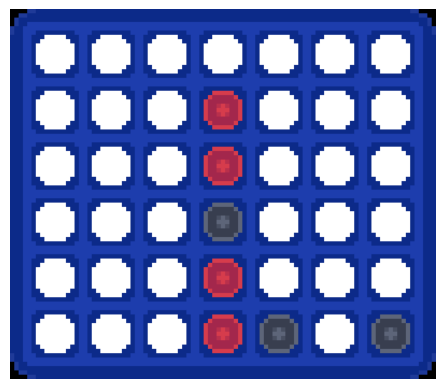


Beschikbare zetten (nummer = beschikbare kolom):
· · · O X · X
· · · O · · ·
· · · X · · ·
· · · O · · ·
· · · O · · ·
· · · · · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 4


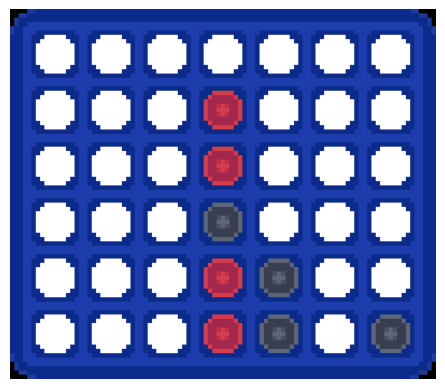

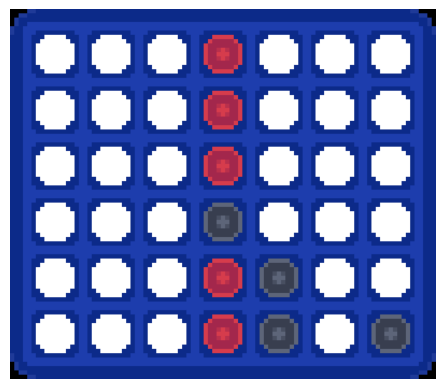


Beschikbare zetten (nummer = beschikbare kolom):
· · · O X · X
· · · O X · ·
· · · X · · ·
· · · O · · ·
· · · O · · ·
· · · O · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 2


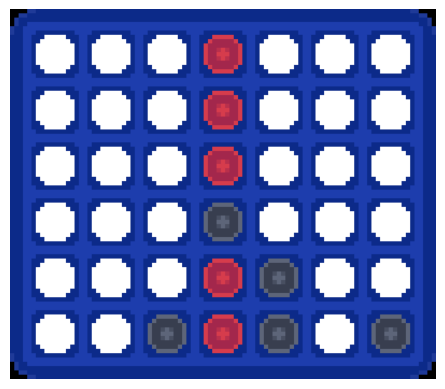

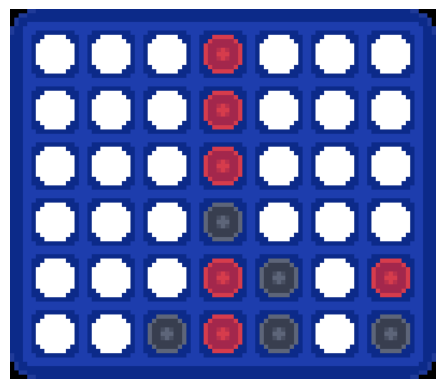


Beschikbare zetten (nummer = beschikbare kolom):
· · X O X · X
· · · O X · O
· · · X · · ·
· · · O · · ·
· · · O · · ·
· · · O · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 2


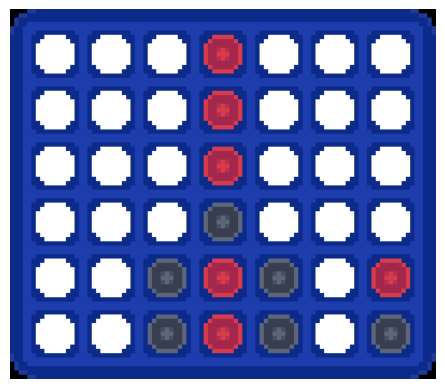

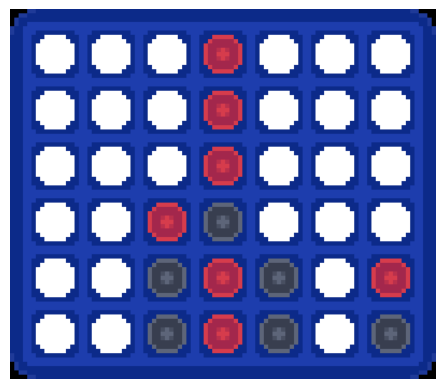


Beschikbare zetten (nummer = beschikbare kolom):
· · X O X · X
· · X O X · O
· · O X · · ·
· · · O · · ·
· · · O · · ·
· · · O · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 4


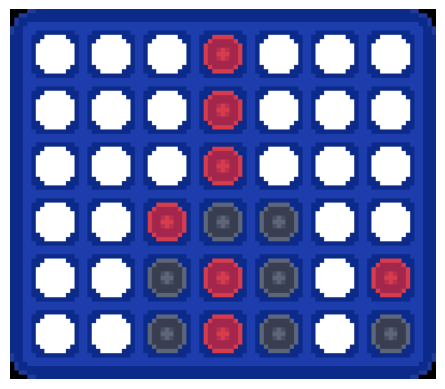

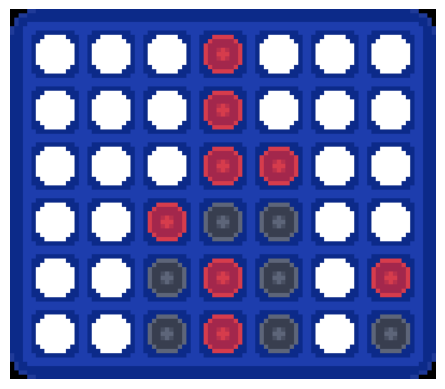


Beschikbare zetten (nummer = beschikbare kolom):
· · X O X · X
· · X O X · O
· · O X X · ·
· · · O O · ·
· · · O · · ·
· · · O · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 5


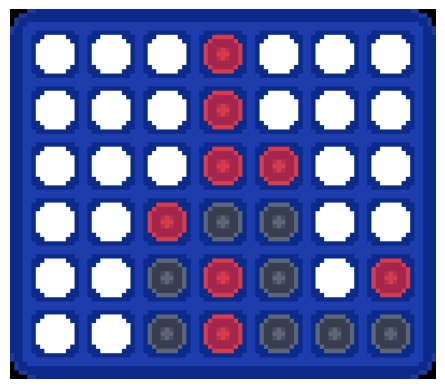

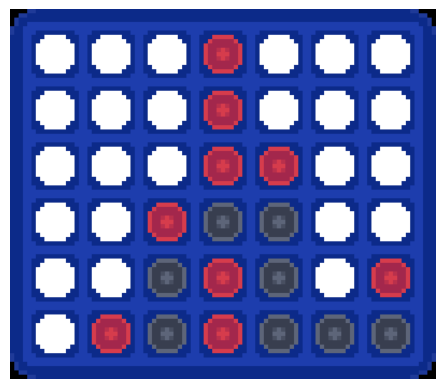


Beschikbare zetten (nummer = beschikbare kolom):
· O X O X X X
· · X O X · O
· · O X X · ·
· · · O O · ·
· · · O · · ·
· · · O · · ·
 0 1 2 3 4 5 6

Kies een kolom (0-6): 2


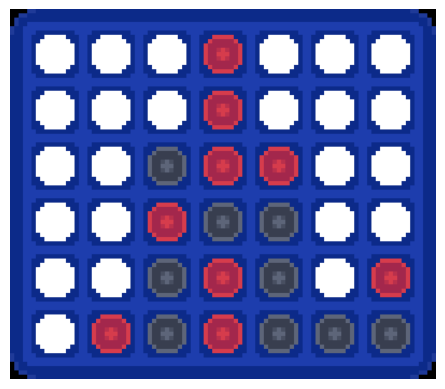

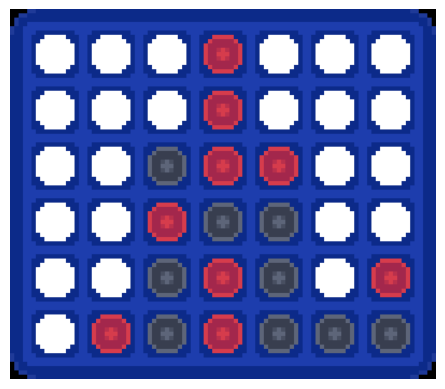

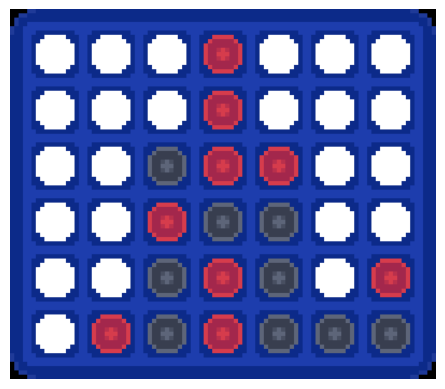

In [19]:
import matplotlib.pyplot as plt
from pettingzoo.classic import connect_four_v3
import numpy as np

# Initialiseer de PettingZoo-omgeving
env = connect_four_v3.env(render_mode="rgb_array")
env.reset(seed=42)

def convert_observation(obs):
    """ Zet de PettingZoo Connect Four observatie om naar een 6x7 bord. """
    board = np.zeros((6, 7), dtype=int)
    for i in range(6):
        for j in range(7):
            if obs[i, j, 0] == 1:
                board[i, j] = 1
            elif obs[i, j, 1] == 1:
                board[i, j] = 2
    return board

def render_board():
    """ Visualiseert het bord met Matplotlib. """
    rgb_image = env.render()
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

def get_human_action(observation):
    """ Vraag de menselijke speler om een zet. """
    mask = observation["action_mask"]
    board = observation["board"]

    print("\nBeschikbare zetten (nummer = beschikbare kolom):")
    visual_board = np.copy(board).astype(str)

    for i in range(6):
        for j in range(7):
            if visual_board[i, j] == "0":
                visual_board[i, j] = "·"
            elif visual_board[i, j] == "1":
                visual_board[i, j] = "X"
            else:
                visual_board[i, j] = "O"

    print("\n".join([" ".join(row) for row in np.flipud(visual_board)]))
    print(" 0 1 2 3 4 5 6")

    while True:
        try:
            move = int(input("\nKies een kolom (0-6): "))
            if 0 <= move < 7 and mask[move]:
                return move
            print("Ongeldige zet, kies een van de beschikbare kolommen.")
        except ValueError:
            print("Voer een geldig nummer in (0-6).")

def rule_based_action(observation, agent):
    """
    ✅ Volledige Regelgebaseerde Agent met Basisregels en Strategische Regels
    """
    mask = observation["action_mask"]
    board = observation["board"]
    player = 1 if agent == "player_1" else 2
    opponent = 2 if player == 1 else 1

    # ✅ BASISREGELS
    # 🔴 Regel 1: Direct winnen als mogelijk
    for col in range(7):
        if mask[col]:
            temp_board = np.copy(board)
            row = np.where(temp_board[:, col] == 0)[0][0]
            temp_board[row, col] = player
            if check_win(temp_board, player):
                return col  

    # 🔵 Regel 2: Blokkeer de tegenstander als hij kan winnen
    for col in range(7):
        if mask[col]:
            temp_board = np.copy(board)
            row = np.where(temp_board[:, col] == 0)[0][0]
            temp_board[row, col] = opponent
            if check_win(temp_board, opponent):
                return col  

    # ⚡ Regel 3: Speel een zet die toekomstige winstmogelijkheden creëert
    for col in range(7):
        if mask[col]:
            temp_board = np.copy(board)
            row = np.where(temp_board[:, col] == 0)[0][0]
            temp_board[row, col] = player
            if count_three_in_a_row(temp_board, player) > 0:
                return col

    # 🔥 Regel 4: Probeer een dubbele dreiging te creëren
    for col in range(7):
        if mask[col]:
            temp_board = np.copy(board)
            row = np.where(temp_board[:, col] == 0)[0][0]
            temp_board[row, col] = player
            if count_double_threat(temp_board, player):
                return col

    # 🛑 Regel 5: Blokkeer als de tegenstander drie-op-een-rij heeft met een open einde
    for col in range(7):
        if mask[col]:
            temp_board = np.copy(board)
            row = np.where(temp_board[:, col] == 0)[0][0]
            temp_board[row, col] = opponent
            if count_three_in_a_row(temp_board, opponent) > 0:
                return col

    # ⭐ Regel 6: Geef de voorkeur aan het spelen in de middelste kolommen
    if mask[3]:
        return 3

    # ⚖ Regel 7: Vermijd zetten die de tegenstander een voordeel geven
    safe_moves = [col for col in range(7) if mask[col] and not check_losing_move(board, col, player)]
    if safe_moves:
        return np.random.choice(safe_moves)

    # ⚠ Regel 8: Kies een willekeurige geldige zet als laatste optie
    valid_moves = [col for col in range(7) if mask[col]]
    return np.random.choice(valid_moves) if valid_moves else None

def check_win(board, player):
    """ Controleert of een speler vier-op-een-rij heeft. """
    for r in range(6):
        for c in range(7 - 3):
            if all(board[r, c + i] == player for i in range(4)):
                return True
    for r in range(6 - 3):
        for c in range(7):
            if all(board[r + i, c] == player for i in range(4)):
                return True
    for r in range(6 - 3):
        for c in range(7 - 3):
            if all(board[r + i, c + i] == player for i in range(4)):
                return True
    for r in range(3, 6):
        for c in range(7 - 3):
            if all(board[r - i, c + i] == player for i in range(4)):
                return True
    return False

def count_three_in_a_row(board, player):
    """ Telt drie-op-een-rij met een open einde. """
    count = 0
    for r in range(6):
        for c in range(7 - 3):
            if sum(board[r, c + i] == player for i in range(4)) == 3 and 0 in [board[r, c + i] for i in range(4)]:
                count += 1
    return count

def count_double_threat(board, player):
    """ Controleert of een zet twee dreigingen tegelijk creëert. """
    return count_three_in_a_row(board, player) >= 2

def check_losing_move(board, col, player):
    """ Controleert of een zet de tegenstander direct laat winnen. """
    temp_board = np.copy(board)
    row = np.where(temp_board[:, col] == 0)[0][0]
    temp_board[row, col] = player
    return check_win(temp_board, 3 - player)

# Start de PettingZoo Connect Four omgeving
env.reset(seed=42)

# Eerste render
render_board()

# Spel loop
for agent in env.agent_iter():
    raw_observation, reward, termination, truncation, info = env.last()

    if termination or truncation:
        action = None
    else:
        observation = {"board": convert_observation(raw_observation["observation"]), "action_mask": raw_observation["action_mask"]}
        action = get_human_action(observation) if agent == "player_1" else rule_based_action(observation, agent)

    env.step(action)
    render_board()

env.close()

- [ ] Zorg dat je code goed gedocumenteerd is, zodat anderen eenvoudig de werking van je systeem kunnen begrijpen en reproduceren.

<a name='4.2'></a>
<h3>&sect;4.2: Documentatie en Retroduceerbaarheid</h3>

[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H5: Validatie en Vergelijking</strong></h2>
</div>

- [ ] Voer tests uit met realistische scenario’s.
- [ ] Documenteer de prestaties van je systeem: hoe accuraat en efficiënt neemt het de juiste beslissingen?

<a name='5.1'></a>
<h3>&sect;5.1: Testen en Evaluatie</h3>

- [ ] Vergelijk je rule-based systeem met de baseline aanpak.
- [ ] Analyseer de voor- en nadelen van je systeem ten opzichte van de baseline.

<a name='5.2'></a>
<h3>&sect;5.2: Vergelijking met Alternatieven</h3>

- [ ] Gebruik grafieken of tabellen om de prestaties en het gedrag van je systeem inzichtelijk te maken.

<a name='5.3'></a>
<h3>&sect;5.3: Visualisatie</h3>

[Back to the top](#start)
<a name='6.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H6: Rapport</strong></h2>
</div>

- [ ] Beschrijving van het probleem en de motivatie voor een rule-based benadering.

<a name='6.1'></a>
<h3>&sect;6.1: Probleemstelling</h3>

- [ ] Uitleg van de gekozen regels, ontwerpkeuzes en implementatiedetails.

<a name='6.2'></a>
<h3>&sect;6.2: Methodologie</h3>

- [ ] Presentatie van de testresultaten, visualisaties en vergelijkende analyses.

<a name='6.3'></a>
<h3>&sect;6.3: Resultaten</h3>

- [ ] Kritische evaluatie van de prestaties en beperkingen van je systeem.

<a name='6.4'></a>
<h3>&sect;6.4: Reflectie</h3>

[Back to the top](#start)
<a name='7.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H7: Literatuurlijst</strong></h2>
</div>

[Back to the top](#start)
<a name='8.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H8: Beoordelingscriteria</strong></h2>
</div>

| Criteria                     | Level 4 (5p) | Level 3 (3p) | Level 2 (2p) | Level 1 (0p) |
|------------------------------|-------------|-------------|-------------|-------------|
| **Use-Case kiezen**          | Het probleem is goed gedefinieerd en er wordt uitgebreid uitgelegd, met goede argumenten, waarom een rule-based benadering het meest geschikt is, in tegenstelling tot andere benaderingen zoals ML. | Het probleem is goed gedefinieerd, maar de argumentatie is beperkt of vergelijkt de rule-based benadering niet met andere benaderingen. | Het probleem is niet goed gedefinieerd en het is onduidelijk waarom een rule-based benadering in dit geval geschikt is. | Het probleem is niet goed gedefinieerd en er wordt geen argumentatie gegeven. |
| **Ontwerpen van de regelset** | De regelset is uitgebreid. Het dekt elk mogelijk scenario in de use-case. De regels zijn logisch en conflicteren niet met elkaar. Er is een uitgebreide uitleg gegeven voor de regelset en de code is goed gedocumenteerd. | De regelset is goed gedefinieerd, logisch en uitgebreid. De uitleg is echter onduidelijk en de documentatie is beperkt of onvolledig. | De regelset is gedeeltelijk geschikt voor het use-case scenario. Er zijn echter onlogische inconsistenties of conflicten tussen de regels. Of / en er zijn situaties die niet door de regelset worden gedekt, of waarbij de regelset onduidelijke of onbedoelde gevolgen heeft. | De regelset is (bijna) volledig ongeschikt voor het gebruiksscenario. |
| **Implementatie**            | De Python-implementatie werkt volledig zoals verwacht. De agent volgt de regelset in elke situatie in de simulatie. De simulatie is 100% reproduceerbaar en toont elke keer de verwachte resultaten. | De Python-implementatie werkt voor het grootste gedeelte van de simulatie, maar faalt in bepaalde scenario's of de agent vertoont af en toe onverwacht gedrag, of de simulatie is niet 100% reproduceerbaar. | De Python-implementatie is rommelig en presteert niet zoals verwacht. De agent faalt vaak of vertoont voor het grootste deel onverwacht gedrag, of de simulatie is bijna nooit reproduceerbaar. | De Python-implementatie werkt nauwelijks of helemaal niet. |
| **Validatie en vergelijking** | De simulatie wordt getest met realistische scenario's en de prestaties worden grondig geanalyseerd. De resultaten van deze analyse worden duidelijk gevisualiseerd. | Er zijn een behoorlijk aantal tests uitgevoerd, maar de testcases zouden uitgebreider kunnen zijn en de analyse van de resultaten zou diepgaander kunnen zijn. | Er is een zeer beperkt aantal testen uitgevoerd of de resultaten zijn niet op een bevredigend niveau geanalyseerd en gevisualiseerd. | Er is nauwelijks tot geen testing gedaan. |
| **Rapporteren**              | Het rapport is helder en goed gestructureerd. De methodologie is goed uitgelegd. | Het rapport is bevredigend, maar het is niet goed gestructureerd en uitgelegd. | Het rapport is rommelig en er ontbreken belangrijke details. | Het rapport is onbevredigend, onjuist of afwezig. |